# Test IPythonb for Debugging 

## Importing Libraries

In [18]:
import os
import zipfile
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

## Polynomial_dataframe function

Using the hints above complete the following function to create an SFrame consisting of the powers of an SArray up to a specific degree:

In [19]:
def polynomial_dataframe(feature, degree): # feature is pandas.Series type
    # assume that degree >= 1
    # initialize the dataframe:
    poly_dataframe = pd.DataFrame()
    # and set poly_dataframe['power_1'] equal to the passed feature
    poly_dataframe['power_1'] = feature
    
    # first check if degree > 1
    if degree > 1:
        # then loop over the remaining degrees:
        for power in range(2, degree+1):
            # first we'll give the column a name:
            name = 'power_' + str(power)
            # assign poly_dataframe[name] to be feature^power; use apply(*)
            poly_dataframe[name] = poly_dataframe['power_1'].apply(lambda x: x**power) 
    return poly_dataframe

To test your function consider the smaller tmp variable and what you would expect the outcome of the following call:

In [20]:
tmp = pd.Series([1.0, 2.0, 3.0])
print polynomial_dataframe(tmp, 3)

   power_1  power_2  power_3
0        1        1        1
1        2        4        8
2        3        9       27


## Loading the Sales Data

In [21]:
# Dictionary with the correct dtypes for the DataFrame columns
dtype_dict = {'bathrooms':float, 'waterfront':int, 'sqft_above':int, 'sqft_living15':float, 'grade':int, 
              'yr_renovated':int, 'price':float, 'bedrooms':float, 'zipcode':str, 'long':float, 
              'sqft_lot15':float, 'sqft_living':float, 'floors':str, 'condition':int, 'lat':float, 
              'date':str, 'sqft_basement':int, 'yr_built':int, 'id':str, 'sqft_lot':int, 'view':int}

In [22]:
sales = pd.read_csv('kc_house_data.csv', dtype = dtype_dict)

In [23]:
# Don't sort the data for now and let's see what happens
sales = sales.sort_values(['sqft_living', 'price'])
sales[['sqft_living', 'price']].head()

,sqft_living,price
19452,290,142000
15381,370,276000
860,380,245000
18379,384,265000
4868,390,228000


## Entering Correct Degree 2 Regression Fit

In [24]:
poly2_data = polynomial_dataframe(sales['sqft_living'], 2)
my_features = list(poly2_data) # Get col_names of DataFrame and put in list
poly2_data['price'] = sales['price'] # add price to the data since it's the target

In [25]:
poly2_data = polynomial_dataframe(sales['sqft_living'], 2)
my_features = list(poly2_data) # Get col_names of DataFrame and put in list
poly2_data['price'] = sales['price'] # add price to the data since it's the target

In [26]:
# Creating feature matrix and output vector to perform regression w/ sklearn.
X_feat_model_2 = poly2_data[my_features]
y_output_model_2 = poly2_data['price']

In [27]:
# Creating a LinearRegression Object. Then, performing linear regression on feature matrix and output vector
model_2 = LinearRegression()
model_2.fit(X_feat_model_2, y_output_model_2)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [28]:
# Let's look at the intercept and weights before we plot.
print model_2.intercept_
print model_2.coef_

199222.279305
[  6.79940947e+01   3.85812609e-02]


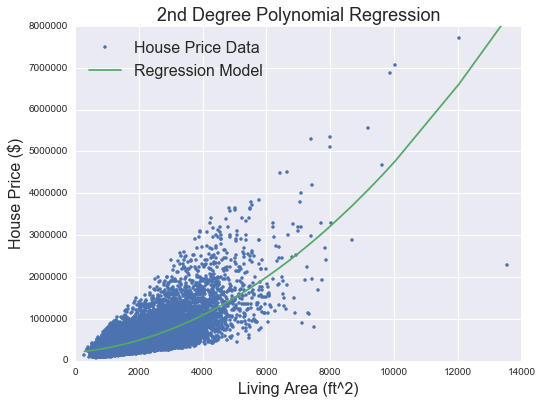

In [29]:
plt.figure(figsize=(8,6))
plt.plot(poly2_data['power_1'],poly2_data['price'],'.', label= 'House Price Data')
plt.hold(True)
plt.plot(poly2_data['power_1'], model_2.predict(X_feat_model_2), '-' , label= 'Regression Model')
plt.hold(False)
plt.legend(loc='upper left', fontsize=16)
plt.xlabel('Living Area (ft^2)', fontsize=16)
plt.ylabel('House Price ($)', fontsize=16)
plt.title('2nd Degree Polynomial Regression', fontsize=18)
plt.axis([0.0, 14000.0, 0.0, 8000000.0])
plt.show()

## Now, testing on the training dataset

In [30]:
train_data = pd.read_csv('wk3_kc_house_train_data.csv', dtype = dtype_dict)

In [31]:
# Leave this cell for the sorting command
train_data = train_data.sort_values(['sqft_living', 'price'])
train_data[['sqft_living', 'price']].head()

,sqft_living,price
8840,290,142000
6982,370,276000
8338,384,265000
2228,390,228000
9631,390,245000


In [32]:
poly_deg_1 = polynomial_dataframe(train_data['sqft_living'], 1)
poly_deg_2 = polynomial_dataframe(train_data['sqft_living'], 2)
poly_deg_3 = polynomial_dataframe(train_data['sqft_living'], 3)
poly_deg_4 = polynomial_dataframe(train_data['sqft_living'], 4)
poly_deg_5 = polynomial_dataframe(train_data['sqft_living'], 5)

feat_deg_1 = list(poly_deg_1)
feat_deg_2 = list(poly_deg_2)
feat_deg_3 = list(poly_deg_3)
feat_deg_4 = list(poly_deg_4)
feat_deg_5 = list(poly_deg_5)

poly_deg_1['price'] = train_data['price']
poly_deg_2['price'] = train_data['price']
poly_deg_3['price'] = train_data['price']
poly_deg_4['price'] = train_data['price']
poly_deg_5['price'] = train_data['price']

X_feat_deg_1 = poly_deg_1[feat_deg_1]
X_feat_deg_2 = poly_deg_2[feat_deg_2]
X_feat_deg_3 = poly_deg_3[feat_deg_3]
X_feat_deg_4 = poly_deg_4[feat_deg_4]
X_feat_deg_5 = poly_deg_5[feat_deg_5]

y_output_deg_1 = poly_deg_1['price']
y_output_deg_2 = poly_deg_2['price']
y_output_deg_3 = poly_deg_3['price']
y_output_deg_4 = poly_deg_4['price']
y_output_deg_5 = poly_deg_5['price']
    
model_deg_1 = LinearRegression()
model_deg_2 = LinearRegression()
model_deg_3 = LinearRegression()
model_deg_4 = LinearRegression()
model_deg_5 = LinearRegression()

model_deg_1.fit( X_feat_deg_1, y_output_deg_1 )
model_deg_2.fit( X_feat_deg_2, y_output_deg_2 )
model_deg_3.fit( X_feat_deg_3, y_output_deg_3 )
model_deg_4.fit( X_feat_deg_4, y_output_deg_4 )
model_deg_5.fit( X_feat_deg_5, y_output_deg_5 )

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

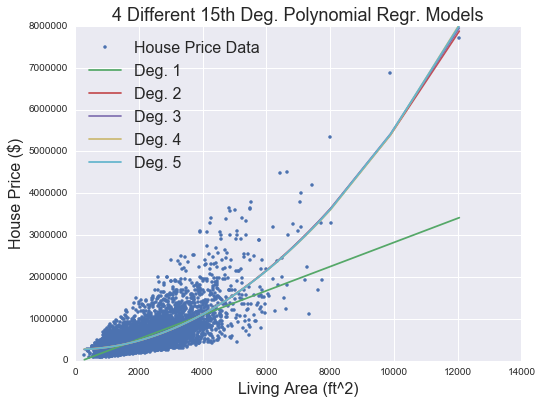

In [33]:
plt.figure(figsize=(8,6))
plt.plot(train_data['sqft_living'], train_data['price'],'.', label= 'House Price Data')
plt.hold(True)
plt.plot(poly_deg_1['power_1'], model_deg_1.predict(X_feat_deg_1), '-' , label= 'Deg. 1')
plt.plot(poly_deg_2['power_1'], model_deg_2.predict(X_feat_deg_2), '-' , label= 'Deg. 2')
plt.plot(poly_deg_3['power_1'], model_deg_3.predict(X_feat_deg_3), '-' , label= 'Deg. 3')
plt.plot(poly_deg_4['power_1'], model_deg_4.predict(X_feat_deg_4), '-' , label= 'Deg. 4')
plt.plot(poly_deg_5['power_1'], model_deg_5.predict(X_feat_deg_5), '-' , label= 'Deg. 5')
plt.hold(False)
plt.legend(loc='upper left', fontsize=16)
plt.xlabel('Living Area (ft^2)', fontsize=16)
plt.ylabel('House Price ($)', fontsize=16)
plt.title('4 Different 15th Deg. Polynomial Regr. Models', fontsize=18)
plt.axis([0.0, 14000.0, 0.0, 8000000.0])
plt.show()

## Now, trying the loop method

In [34]:
poly_deg_dict = {}
key_list = []

X_feat_dict = {}
y_output_dict = {}

model_poly_deg = {}

for i in range(1, 15+1, 1):
    
    key_poly_deg = 'poly_deg_' + str(i)
    key_list.append(key_poly_deg)
    
    poly_deg_dict[key_poly_deg] = polynomial_dataframe(train_data['sqft_living'], i)
    feat_poly_fit = list(poly_deg_dict[key_poly_deg])
    poly_deg_dict[key_poly_deg]['price'] = train_data['price']
    
    X_feat_dict[key_poly_deg] = poly_deg_dict[key_poly_deg][feat_poly_fit]
    y_output_dict[key_poly_deg] = poly_deg_dict[key_poly_deg]['price']
    
    model_poly_deg[key_poly_deg] = LinearRegression()
    model_poly_deg[key_poly_deg].fit( X_feat_dict[key_poly_deg], y_output_dict[key_poly_deg] )

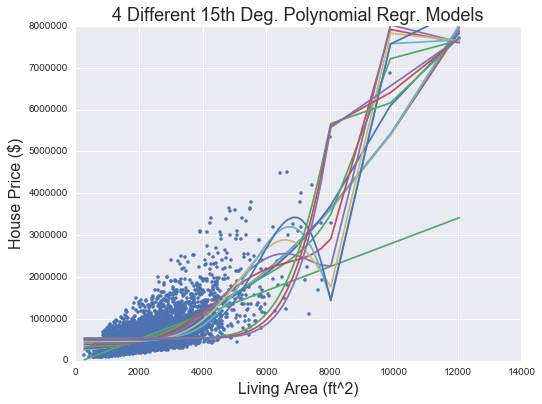

In [37]:
plt.figure(figsize=(8,6))
plt.plot(train_data['sqft_living'], train_data['price'],'.', label= 'House Price Data')
plt.hold(True)

for i in range(0,15):
    
    plt.plot( poly_deg_dict[key_list[i]]['power_1'], model_poly_deg[key_list[i]].predict(X_feat_dict[key_list[i]]), '-' )
             

#plt.plot(poly15_set_1['power_1'], model_deg_15_set_1.predict(X_feat_set_1), '-' , label= 'Model 1')
#plt.plot(poly15_set_2['power_1'], model_deg_15_set_2.predict(X_feat_set_2), '-' , label= 'Model 2')
#plt.plot(poly15_set_3['power_1'], model_deg_15_set_3.predict(X_feat_set_3), '-' , label= 'Model 3')
#plt.plot(poly15_set_4['power_1'], model_deg_15_set_4.predict(X_feat_set_4), '-' , label= 'Model 4')


plt.hold(False)
#plt.legend(loc='upper left', fontsize=16)
plt.xlabel('Living Area (ft^2)', fontsize=16)
plt.ylabel('House Price ($)', fontsize=16)
plt.title('4 Different 15th Deg. Polynomial Regr. Models', fontsize=18)
plt.axis([0.0, 14000.0, 0.0, 8000000.0])
plt.show()